Final Project Submission

Please fill out:

Student name: Paul Gitonga Njoki

Student pace: full time:

Scheduled project review date/time:

Instructor name:

Blog post URL:

BEST PERFORMING MOVIE ANALYSIS

Authored by Paul Gitonga Njoki

Overview

Microsoft as a company wants to start on creating original video content but do not have enough knowledge about movie creation to move forward with their plan. Using data obtained from the Rotten Tomatoes and Box Office Mojo datasets for analysis, it helped in discovering patterns and relationships in the data in order to make better decisions and recommendations that Microsoft will use in order for them to venture into movie crteation.

DATA UNDERSTANDING

Data that is used for this task was obtained from movie websites. I chose to work with two data sets that is the Rotten Tomatoes and Box Office Mojo datasets. After importing the necessary libraries to be used, we then read the data and understand its structrute,data contained and cleaning it before we go ahead to analyzing them to give us efficient information about movies before making conclusions.

In [1]:
#loading Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from scipy import stats
from scipy.stats import norm

Rotten Tomatoes Data

In [2]:
#reading ROTTEN TOMATOES data from the tsv file
rtmovie_df = pd.read_csv("C:/Users/hp/Documents/Moringa_project_phase_1/phase_1_project/learn-co-curriculum dsc-phase-1-project master zippedData/rt.movie_info.tsv.gz", sep='\t', header=0)
rtmovie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [3]:
#dropping unwanted columns
rtmovie_df = rtmovie_df.drop(rtmovie_df.columns[0], axis='columns')

In [4]:
rtmovie_df.shape

(1560, 11)

In [5]:
#checking the columns in the dataframe

rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [6]:
#getting the summary of rotten tomatoes dataframe

rtmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 134.2+ KB


In [7]:
# Checking for null values

rtmovie_df.isnull().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [8]:
# obtaining counts for each value in genre column#

rtmovie_df['genre'].value_counts()

genre
Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness       

In [9]:
#obtaing descriptive statistics for the genre column to determine the top genre
rtmovie_df['genre'].describe()

count      1552
unique      299
top       Drama
freq        151
Name: genre, dtype: object

Data for Box Office Mojo

In [10]:
#calling the box office mojo data from the  csv file
#checking the first 5 elements of the dataframe

mojo_df = pd.read_csv("learn-co-curriculum dsc-phase-1-project master zippedData/bom.movie_gross.csv.gz")
mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
#obtaining coloumns in the dataframe

mojo_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [12]:
#obtainning number of columns androws
mojo_df.shape

(3387, 5)

In [13]:
#getting data types per column

mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [14]:
# getting total number of NaN values in the dataset

mojo_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
#checking the summary of the mojo dataframe

mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# top studios

top10 = mojo_df['studio'].value_counts().head()
top10

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64

In [17]:
type(top10)

pandas.core.series.Series

In [18]:
mojo_df.groupby(['studio']).sum()

,title,domestic_gross,foreign_gross,year
studio,,,,
3D,Sea Rex 3D: Journey to a Prehistoric World,6100000.0,9900000,2010
A23,Revenge of the Electric CarRed Obsession,164200.0,0,4024
A24,Spring BreakersThe Bling RingThe Spectacular N...,324194200.0,1760000013300000630000028000002400000210000011...,98754
ADC,A Royal Night OutAbsolutely Anything,248200.0,0,4032
AF,BarbaraSister (2012)Caesar Must DieOmarBethleh...,2142900.0,3100000400000,12080
...,...,...,...,...
XL,Storm Surfers 3DJimi: All Is By My Side,458000.0,0,4027
YFG,Papa: Hemingway in Cuba,1100000.0,0,2016
Yash,Band Baaja BaaraatBadmaash CompanyMere Brother...,31631400.0,6070064400800000008110000025900000818000003900000,28194


In [19]:
#descriptive statistics for each column 

mojo_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [20]:
#checking the years we'll be working with
mojo_df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

DATA PREPARATION

I prepared the data for analysis by performing data preparation, which included data cleaning, after deciding the preferred data sets to employ.

We will perform the following after data cleaning:

    1.  Inspect for and remove any unnecessary columns.
    2.  Standardization, column renaming, and data type conversion were required. Upper case values were to be changed to lower case values.
    3.  Verify any null values and remove them.
    4.  Search for missing values, then take appropriate action.
    5.  Check for duplicate values and remove them if necessary.
Regarding the BOM Data;

In [21]:
#dropping columns in the dataframe that won't be needed during analysis

mojo_df.drop(['title'], axis=1, inplace=True)

In [22]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [23]:
# checking if there are any duplication
mojo_df.duplicated().value_counts()

False    3376
True       11
Name: count, dtype: int64

In [24]:
# missing values inspection
row_count = mojo_df.shape[0]
missing_count = row_count - mojo_df.count() 
missing_count

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [25]:
# duplicates check
duplicateRows = mojo_df[mojo_df.duplicated()]
duplicateRows.count()

studio            11
domestic_gross    11
foreign_gross      0
year              11
dtype: int64

In [26]:
# checking null values

mojo_df.isnull().any()

studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [27]:
# duplicates check

mojo_df.duplicated().sum()

11

For Rotten Tomatoes Data:

I started by dropping columns that i will not need in the analysis

In [28]:
rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [29]:
rtmovie_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [30]:
#total NaN values in the data set
rtmovie_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [31]:
#missing values check 
row_count = rtmovie_df.shape[0]
missing_count = row_count - rtmovie_df.count() 
missing_count

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Data Analysis

mojo_df
Analysis for top 10 studios against their domestic gross

In [32]:
#sorting the data for top to studios


mojo_dfagg = mojo_df.groupby(['studio']).agg('sum')

In [33]:
mojo_dfagg = mojo_dfagg.sort_values('domestic_gross', ascending=False).head(10)
mojo_dfagg

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,6520000006913000003910000002280000002456000001...,213451
Uni.,1.290239e+10,2916000002164000001622000007780000059800000642...,296082
WB,1.216805e+10,6643000005357000003300000001112000001013000006...,281941
Fox,1.094950e+10,3113000001855000001946000001377000001000000008...,273882
Sony,8.459683e+09,1825000001752000002107000001094000001280000001...,221575
Par.,7.685871e+09,3115000001879000001668000008100000092800000545...,203417
LGF,4.118963e+09,1714000009040000051100000481000002670000046300...,207437
WB (NL),3.995700e+09,1930000001060000005260000024200000921000001153...,90644
LG/S,2.078200e+09,5374000001613000001054000002960000027600000870...,82599


In [34]:
mojo_dfagg.index

Index(['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW'],
      dtype='object', name='studio')

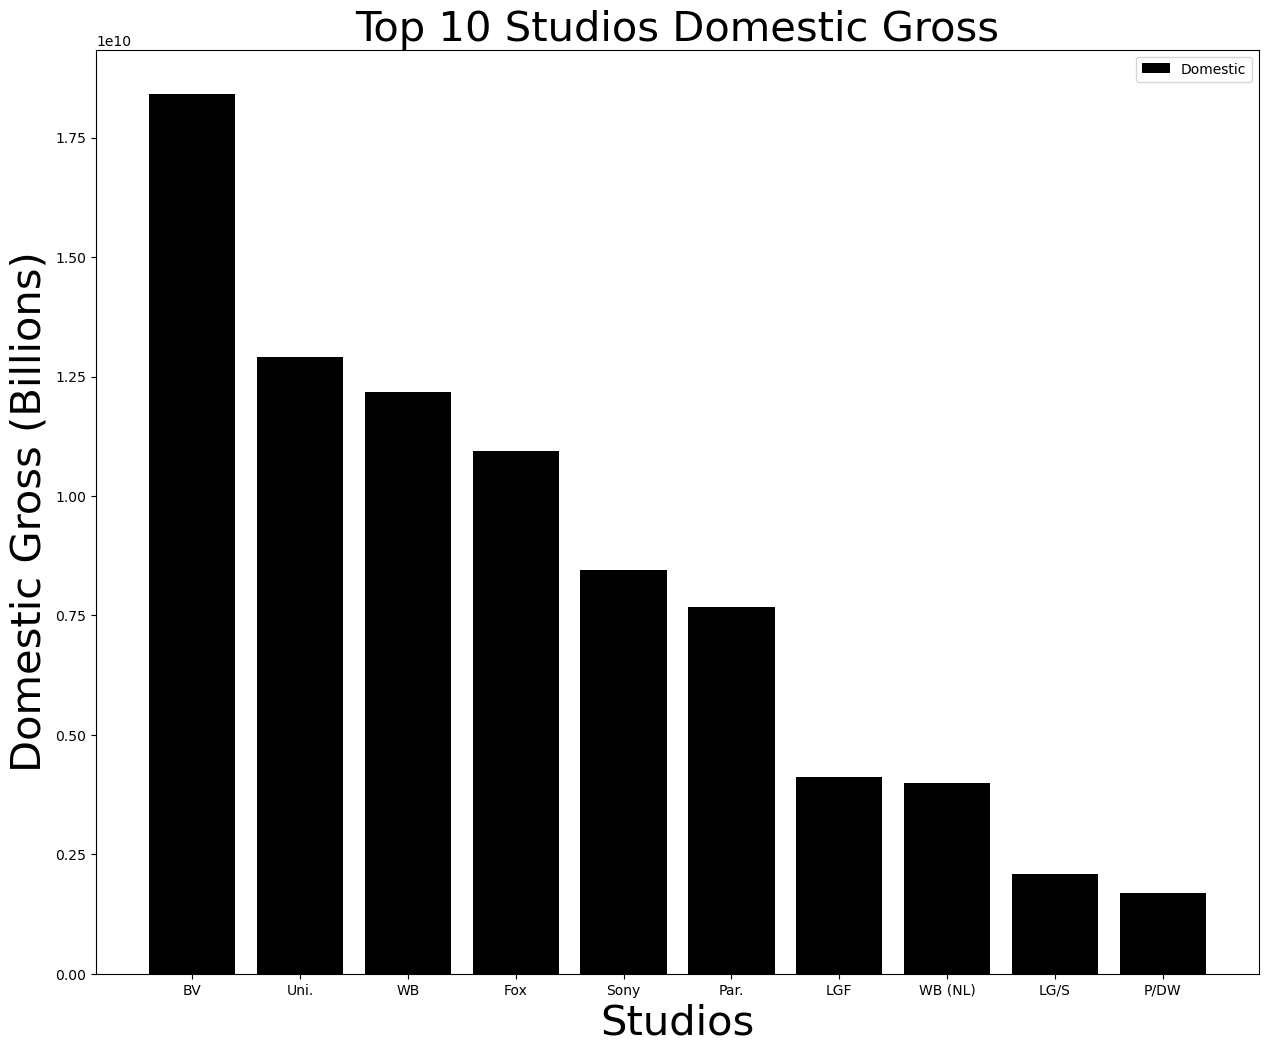

In [35]:
#bar graph plot for top 10 studios domestic gross


plt.figure(figsize=(15,12))

studios = mojo_dfagg.index
dom_gross = mojo_dfagg.domestic_gross


plt.bar(range(len(studios)), dom_gross, color='blue')

plt.title('Top 10 Studios Domestic Gross', fontsize=30)
plt.xlabel('Studios', fontsize=30)
plt.ylabel('Domestic Gross (Billions)', fontsize=30)
plt.xticks(range(len(studios)), studios)

plt.legend(['Domestic'])
plt.show();

which genre of movie is produced more?

In [36]:
#as par to rtmovie_df

rtmovie_df.genre.value_counts()

genre
Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness       

Text(0.5, 1.0, 'Distribution of Genres')

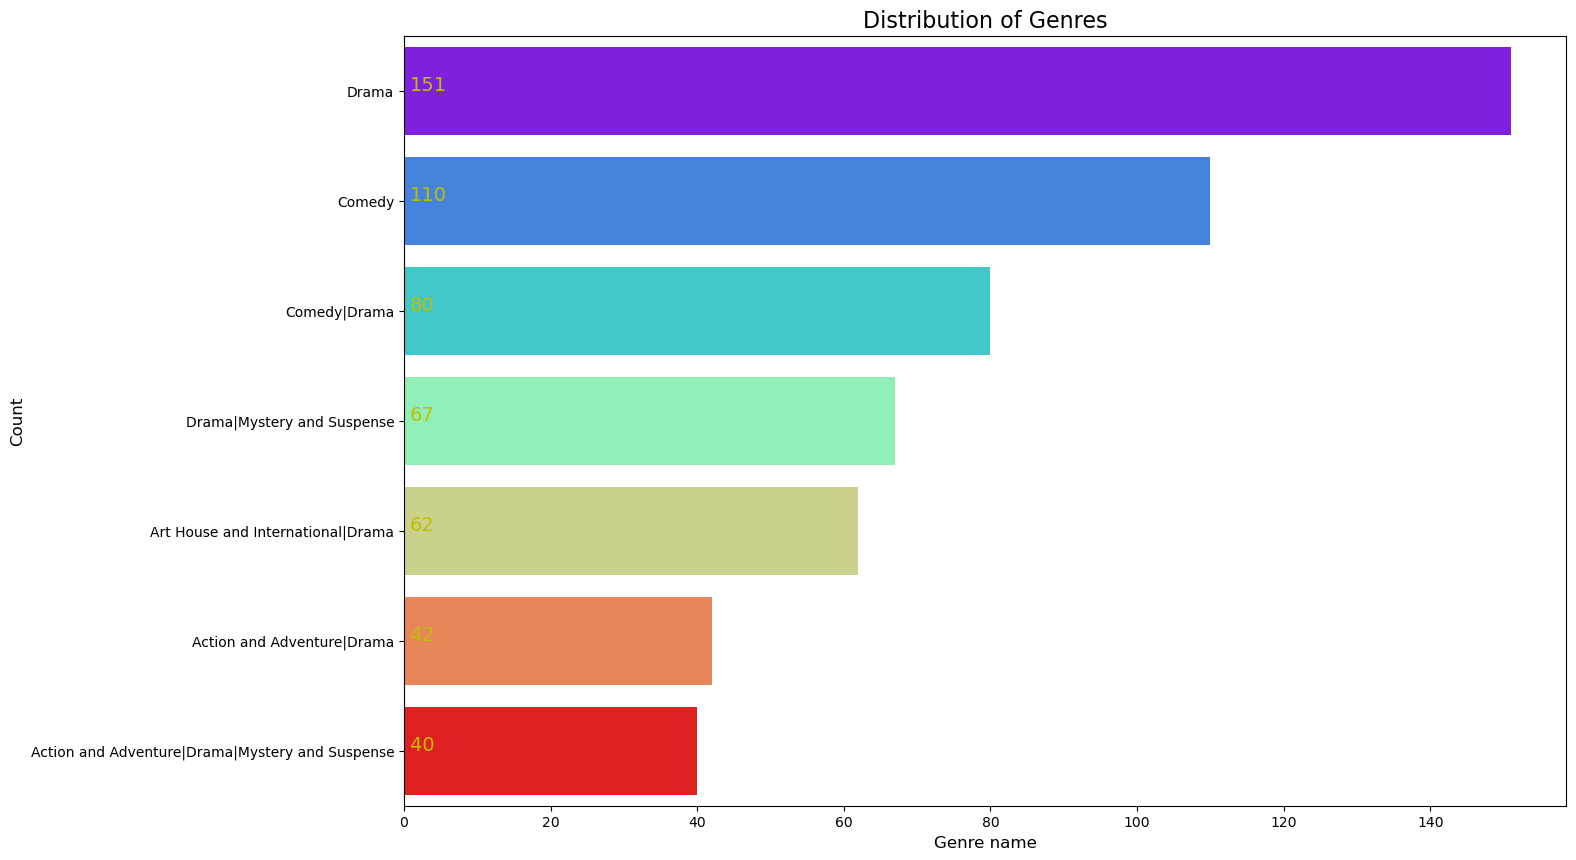

In [37]:
#Frequency of movie genres

rtmovie_df['first_genre'] = rtmovie_df['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = rtmovie_df['first_genre'].value_counts()[:7]
sns.barplot(x=count.values,y=count.index, palette=plt.cm.rainbow(np.linspace(0, 1, 7)))
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='y',fontsize=14)
plt.xlabel('Genre name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)


By looking at the overall amount of films created in each genre, we can observe that drama films are produced more frequently than comedies, with a combination of art house and international|classics|mystery and Suspense being the least frequently produced.

In [38]:
#viewing all the unique ratings in the dataframe

rtmovie_df['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [39]:
#checking on the total number of counts per genre:

rtmovie_df['rating'].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

<Axes: >

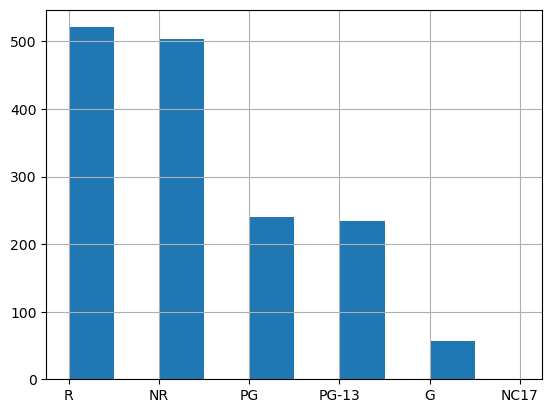

In [40]:
#visualizing this on a histogram, we'll have

rtmovie_df['rating'].hist(bins=10)

By evaluating the total number of films under each category, we deduce that films with a R rating are being produced more frequently than those with an NC17 rating.

In [41]:
# convert release date column to datetime values
rtmovie_df['dvd_date'] = pd.to_datetime(rtmovie_df['dvd_date'])
# create release month column
rtmovie_df['release_month'] = rtmovie_df['dvd_date'].dt.strftime('%B')

In [42]:
# checking for successful column creation
rtmovie_df['release_month'].value_counts()

release_month
March        128
May          117
October      110
September    107
February     107
November     102
June          99
August        98
April         93
January       81
July          81
December      78
Name: count, dtype: int64

<Axes: >

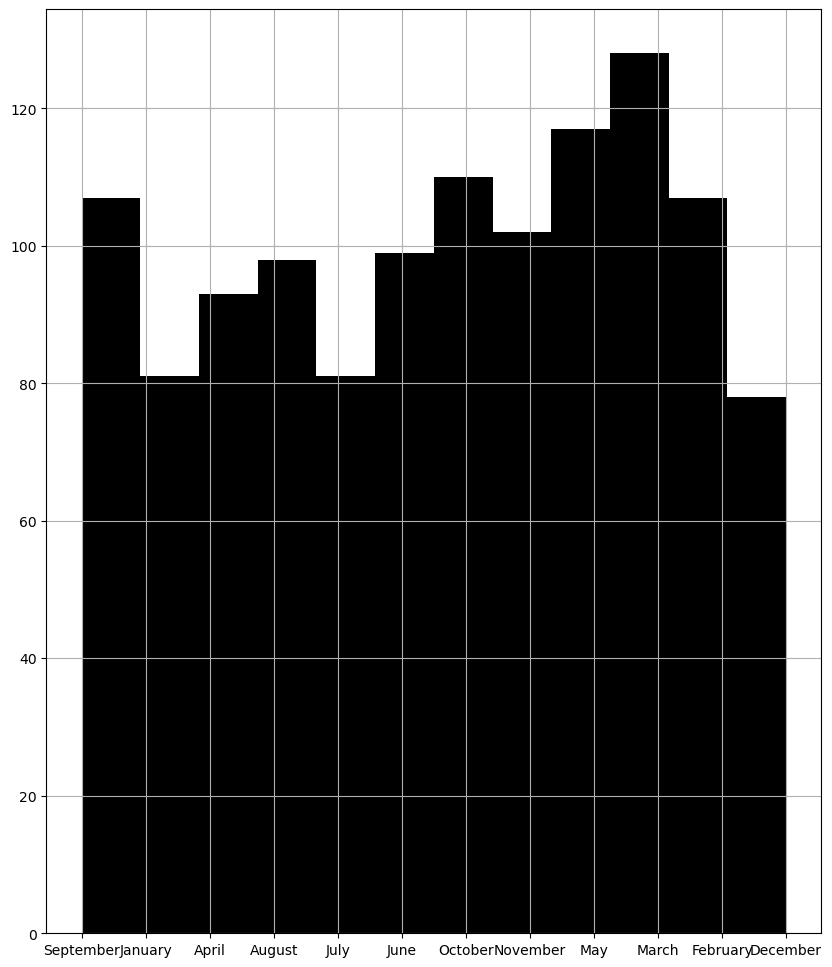

In [59]:
#visualizing this on a histogram, we'll have

rtmovie_df['release_month'].hist(bins=12, figsize=(10,12), color=('k'))

In [44]:
##Assesing df
rtmovie_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,first_genre,release_month
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",2013-01-01,$,"600,000",108 minutes,Entertainment One,Drama|Science Fiction and Fantasy,January
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",2000-04-18,NaN,NaN,116 minutes,NaN,Drama|Musical and Performing Arts,April
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaT,NaN,NaN,200 minutes,NaN,Drama|Romance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006",2007-01-02,$,"33,886,034",106 minutes,New Line Cinema,Action and Adventure|Horror|Mystery and Suspense,January
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993",2001-04-17,NaN,NaN,88 minutes,Paramount Vantage,Comedy|Science Fiction and Fantasy,April
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962",2004-05-11,NaN,NaN,111 minutes,NaN,Classics|Comedy|Drama|Musical and Performing Arts,May
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993",2002-01-29,NaN,NaN,101 minutes,NaN,Comedy|Drama|Kids and Family|Sports and Fitness,January


merging BOM data and Rotten Tomatoes dataframes


In [45]:
# merging the Dfs
merged_df = pd.merge(rtmovie_df, mojo_df, how='outer')
# previewing the new DataFrame
merged_df.shape

(9213, 16)

In [46]:
merged_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,first_genre,release_month,domestic_gross,foreign_gross,year
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September,96900.0,3300000,2010.0
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September,70600.0,3300000,2011.0
2,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September,NaN,4000000,2012.0
3,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September,7100.0,NaN,2014.0
4,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,Action and Adventure|Classics|Drama,September,NaN,122000000,2017.0


In [47]:
# show number of rows and columns
merged_df.shape

(9213, 16)

In [48]:
# show all column names
merged_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio',
       'first_genre', 'release_month', 'domestic_gross', 'foreign_gross',
       'year'],
      dtype='object')

In [49]:
 #counts per genre of the merged dataframe

count = merged_df['genre'].value_counts()
count

genre
Drama|Mystery and Suspense                                                                      531
Drama                                                                                           489
Comedy|Drama                                                                                    421
Comedy                                                                                          338
Art House and International|Drama                                                               274
                                                                                               ... 
Action and Adventure|Animation|Science Fiction and Fantasy                                        1
Action and Adventure|Animation|Drama|Science Fiction and Fantasy|Special Interest                 1
Kids and Family|Musical and Performing Arts                                                       1
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy  

In [50]:
pop_genres = count.iloc[:20]
pop_genres

genre
Drama|Mystery and Suspense                                531
Drama                                                     489
Comedy|Drama                                              421
Comedy                                                    338
Art House and International|Drama                         274
Action and Adventure|Drama|Mystery and Suspense           152
Action and Adventure|Drama                                152
Drama|Romance                                             133
Art House and International|Comedy|Drama                  131
Horror                                                    123
Comedy|Romance                                            104
Classics|Drama                                             97
Action and Adventure                                       91
Classics|Drama|Mystery and Suspense                        90
Comedy|Drama|Romance                                       71
Action and Adventure|Science Fiction and Fantasy           68
Ac

<Axes: title={'center': 'Top Popular Genres'}, xlabel='genre'>

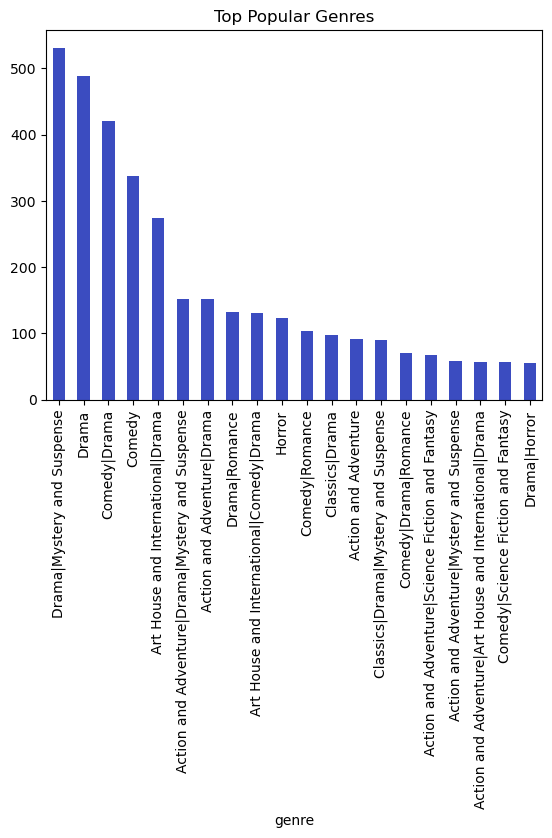

In [51]:
#top 20 popular movies that is with the most value counts represented in a graph:

pop_genres.plot.bar(x = 'genres', title = 'Top Popular Genres', colormap='coolwarm')

In [52]:
# getting mean and median world domestic amounts by genre

genre_stats = merged_df.groupby('genre')['domestic_gross'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

,median,mean
genre,,
Drama|Mystery and Suspense,30350000.0,5.553751e+07
Art House and International|Comedy|Drama|Musical and Performing Arts,17048450.0,3.336243e+07
Drama|Horror|Mystery and Suspense,70600.0,8.384258e+06
Action and Adventure|Mystery and Suspense,70600.0,6.719047e+06
Drama|Horror,1500000.0,6.237862e+06
...,...,...
Horror|Kids and Family|Mystery and Suspense|Science Fiction and Fantasy,NaN,NaN
Horror|Musical and Performing Arts|Science Fiction and Fantasy,NaN,NaN
Horror|Mystery and Suspense|Science Fiction and Fantasy,NaN,NaN


In [53]:
#filtering the dataframe based on Drama|Mystery and Suspense which is the top genre

DramaMS=merged_df.loc[merged_df['genre'] == "Drama|Mystery and Suspense"]
DramaMS

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,first_genre,release_month,domestic_gross,foreign_gross,year
10,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August,96900.0,3300000,2010.0
11,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August,70600.0,3300000,2011.0
12,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August,NaN,4000000,2012.0
13,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August,7100.0,NaN,2014.0
14,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,Drama|Mystery and Suspense,August,NaN,122000000,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003",2004-06-08,$,"88,800,000",137 minutes,WB,Drama|Mystery and Suspense,June,3200000.0,NaN,2018.0
6002,Abel Ferrara's cult crime drama Bad Lieutenant...,R,Drama|Mystery and Suspense,Werner Herzog,NaN,"Nov 20, 2009",2010-04-06,$,"1,616,556",121 minutes,First Look Pictures,Drama|Mystery and Suspense,April,NaN,NaN,NaN
6212,"Filmed in the California desert on Super 16mm,...",NR,Drama|Mystery and Suspense,Oren Shai,Oren Shai|Webb Wilcoxen,"Oct 28, 2016",2016-12-06,NaN,NaN,88 minutes,Rocking Films,Drama|Mystery and Suspense,December,NaN,NaN,NaN
6285,Frankie is a Los Angeles drug dealer. He comes...,R,Drama|Mystery and Suspense,Nick Cassavetes,Nick Cassavetes,"Jan 12, 2007",2007-05-01,$,"15,133,185",118 minutes,Universal Studios,Drama|Mystery and Suspense,May,NaN,NaN,NaN


In [54]:
#filtering out the most common director in the Drama|Mystery and Suspense genre

DramaMS['director'].value_counts()

director
Clint Eastwood                   141
Gary Wheeler                     136
Joseph Ruben                      10
Gary Fleder                        6
Mike Figgis                        6
Barry Levinson                     5
Lewis Gilbert                      5
John Badham                        5
Curtis Hanson                      5
Shawn Christensen                  5
William Beaudine                   5
Andy Wolk                          5
Andrew Chapman                     5
Bob Rafelson|George Bud Davis      5
Robert Foster                      5
Michael Fields                     5
Andrew Birkin                      5
Spike Lee                          5
Peter Hyams                        5
James Cox                          5
Steven Hilliard Stern              5
Gordon Willis                      5
Irving Lerner                      5
Fritz Lang                         5
Paul Wendkos                       5
Uli Edel                           5
Nathan Hope                  

In [55]:
DramaMS['release_month'].value_counts()

release_month
June         152
February      31
March         30
September     20
August        16
May           15
December      12
April         12
November      12
July           5
January        5
October        5
Name: count, dtype: int64

<Axes: >

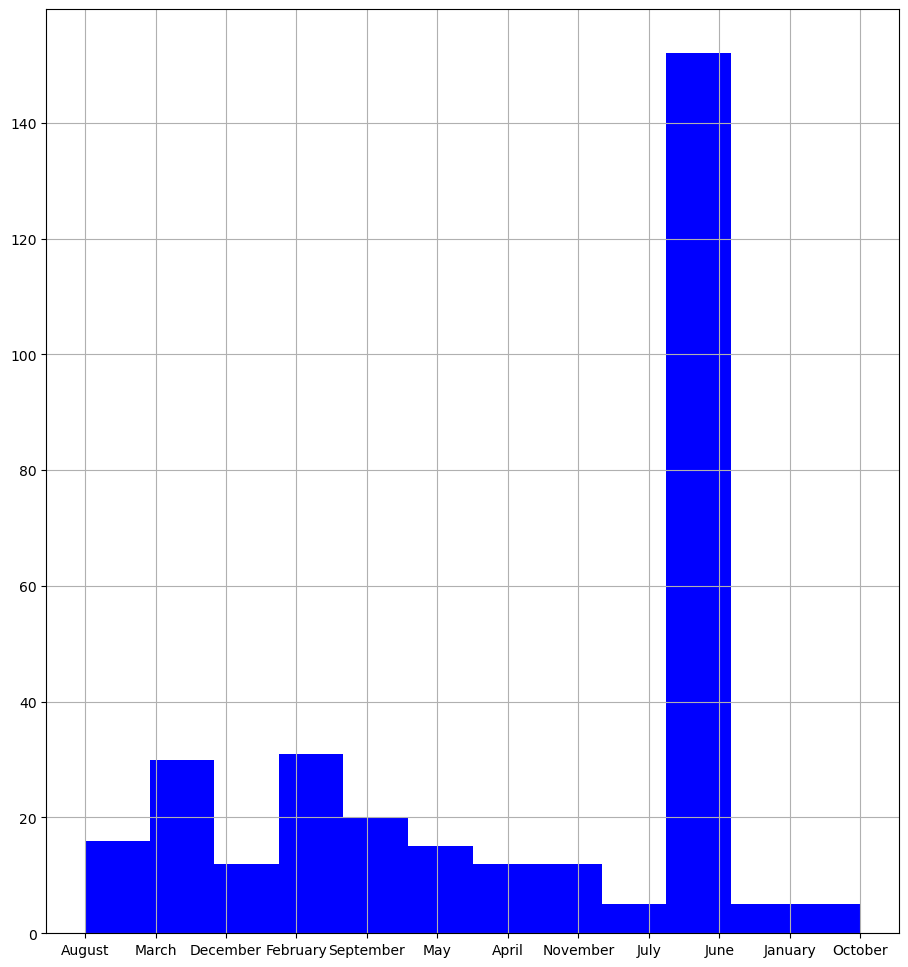

In [56]:
# Visualizing MONTH RELEASED using histogram
DramaMS['release_month'].hist(bins=12, figsize=(11,12), color=('blue'))

Most Drama|Mystery and Suspense movies were released in the month of june

In [57]:
DramaMS['rating'].value_counts()

rating
R        293
PG-13    152
NR        76
G          5
PG         5
Name: count, dtype: int64